## Impotações necessárias

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import random

## Definição de funções

### Função de leitura

In [3]:
def load_spam_collection(data_path, seed=123):
    ''' 
        Classification:
        
        SPAM: 1
        HAM: 0
    '''

    spamfilter_df = pd.read_csv(data_path, delimiter='\t', header=None)
    spamfilter_df.columns = ['label', 'message']
    
    train_texts = []
    train_labels = []

    for index, row in spamfilter_df.iterrows():
        train_texts.append(row['message'])
        train_labels.append(1 if row['label'] == "spam" else 0)
    
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)
    
    return (train_texts, np.array(train_labels))

### Funções de análises de dados

In [4]:
def get_num_documents(sample_message):
    return len(sample_message)


def get_num_words_per_document(sample_message):
    num_words = [len(s.split()) for s in sample_message]
    return np.median(num_words)


def get_num_classes(labels):
    ''' 
        There should be at lease one sample for values
        in the range (0, num_classes - 1)
    '''
    num_classes = max(labels) + 1
    missin_classes = [i for i in range(num_classes) if i not in labels]

    if len(missin_classes):
        raise ValueError(f"Missing samples with labels valu(es) {missin_classes}.")

    if num_classes <= 1:
        raise ValueError(f"Invalid number of labels {num_classes}.")

    return num_classes


def plot_sample_length_distribuition(sample_message):
    plt.hist(
        [len(s) for s in sample_message], 
        50, 
        color='skyblue', 
        edgecolor='black'
    )

    plt.xlabel('Lenght of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribuition')
    plt.show()


def plot_class_distribuition(labels):
    num_classes = get_num_classes(labels)
    count_map = Counter(labels)
    counts = [count_map[i] for i in range(num_classes)]
    idx = np.arange(num_classes)

    plt.bar(
        idx, 
        counts, 
        width=0.8, 
        color='skyblue', 
        edgecolor='black'
    )

    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Class distribution')
    plt.xticks(idx, idx)
    plt.show()

## Aplicando a análise

In [6]:
data_path = "data/SMSSpamCollection" 
train_text, train_labels = load_spam_collection(data_path)

num_doc = get_num_documents(train_text)
num_word_per_document = get_num_words_per_document(train_text)
num_classes = get_num_classes(train_labels)

print(f"Numero total de documentos: {num_doc}")

Numero total de documentos: 5572


In [7]:
print(f"Numero medio de palavras por documento: {num_word_per_document: .2f}")

Numero medio de palavras por documento:  12.00


In [8]:
print(f"Numero de classes: {num_classes}")

Numero de classes: 2


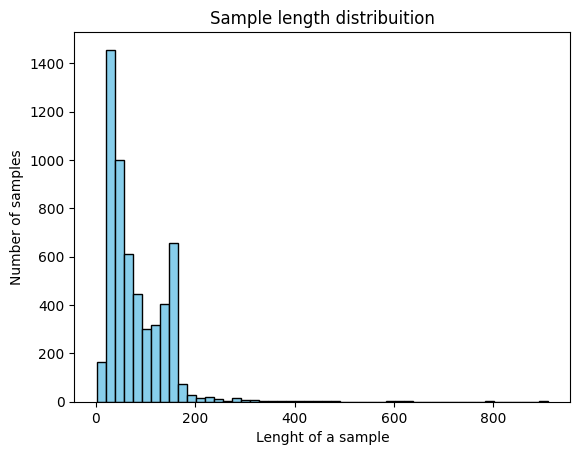

In [9]:
plot_sample_length_distribuition(train_text)

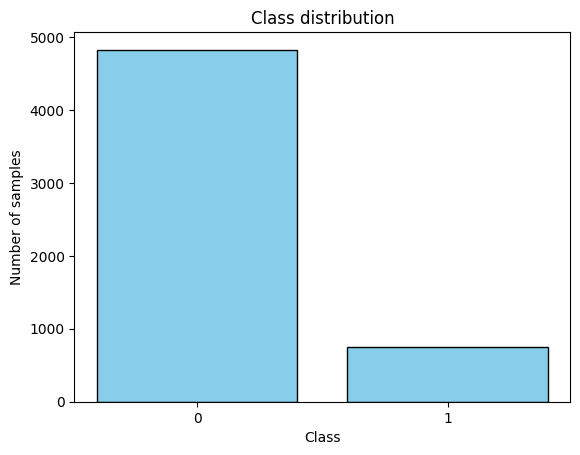

In [10]:
plot_class_distribuition(train_labels)